In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("C:/Users/amarn/Desktop/Data Science/Python/Netflix 5-Year Dataset.csv")

In [3]:
data.head()

,Date,Close/Last,Volume,Open,High,Low
0,05/26/2022,191.40,8049933,186.490,192.3402,183.0916
1,05/25/2022,187.83,8522092,180.280,188.8700,180.1700
2,05/24/2022,180.34,7706372,182.000,184.0000,177.1700
3,05/23/2022,187.44,9602027,186.150,187.6600,177.8900
4,05/20/2022,186.35,10429400,185.867,190.1900,179.7700


In [4]:
data.describe()

,Close/Last,Volume,Open,High,Low
count,1259.000000,1.259000e+03,1259.000000,1259.000000,1259.000000
mean,380.386291,7.736560e+06,380.484846,386.183659,374.317828
std,128.956139,6.596584e+06,129.119515,130.493529,127.569746
min,146.170000,1.143952e+06,146.130000,147.270000,144.250000
25%,294.170000,4.299561e+06,294.995000,298.980000,289.450000
50%,361.810000,5.959214e+06,361.960000,367.330000,356.620000
75%,494.455000,9.198208e+06,495.000000,502.895000,487.770050
max,691.690000,1.333875e+08,692.350000,700.989400,686.090000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1259 non-null   object 
 1   Close/Last  1259 non-null   float64
 2   Volume      1259 non-null   int64  
 3   Open        1259 non-null   float64
 4   High        1259 non-null   float64
 5   Low         1259 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 59.1+ KB


<AxesSubplot:>

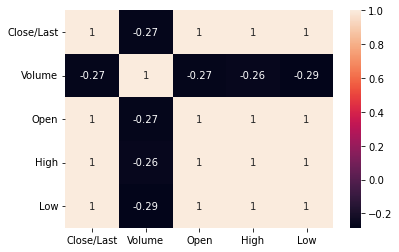

In [6]:

sns.heatmap(data.corr(), annot=True, cbar='magma')

In [7]:
import datetime as dt

In [8]:
data['Date'] = pd.to_datetime(data['Date']).dt.date
data['Month'] = pd.to_datetime(data['Date']).dt.month
data['Year'] = pd.to_datetime(data['Date']).dt.year

In [9]:
data.head()

,Date,Close/Last,Volume,Open,High,Low,Month,Year
0,2022-05-26,191.40,8049933,186.490,192.3402,183.0916,5,2022
1,2022-05-25,187.83,8522092,180.280,188.8700,180.1700,5,2022
2,2022-05-24,180.34,7706372,182.000,184.0000,177.1700,5,2022
3,2022-05-23,187.44,9602027,186.150,187.6600,177.8900,5,2022
4,2022-05-20,186.35,10429400,185.867,190.1900,179.7700,5,2022


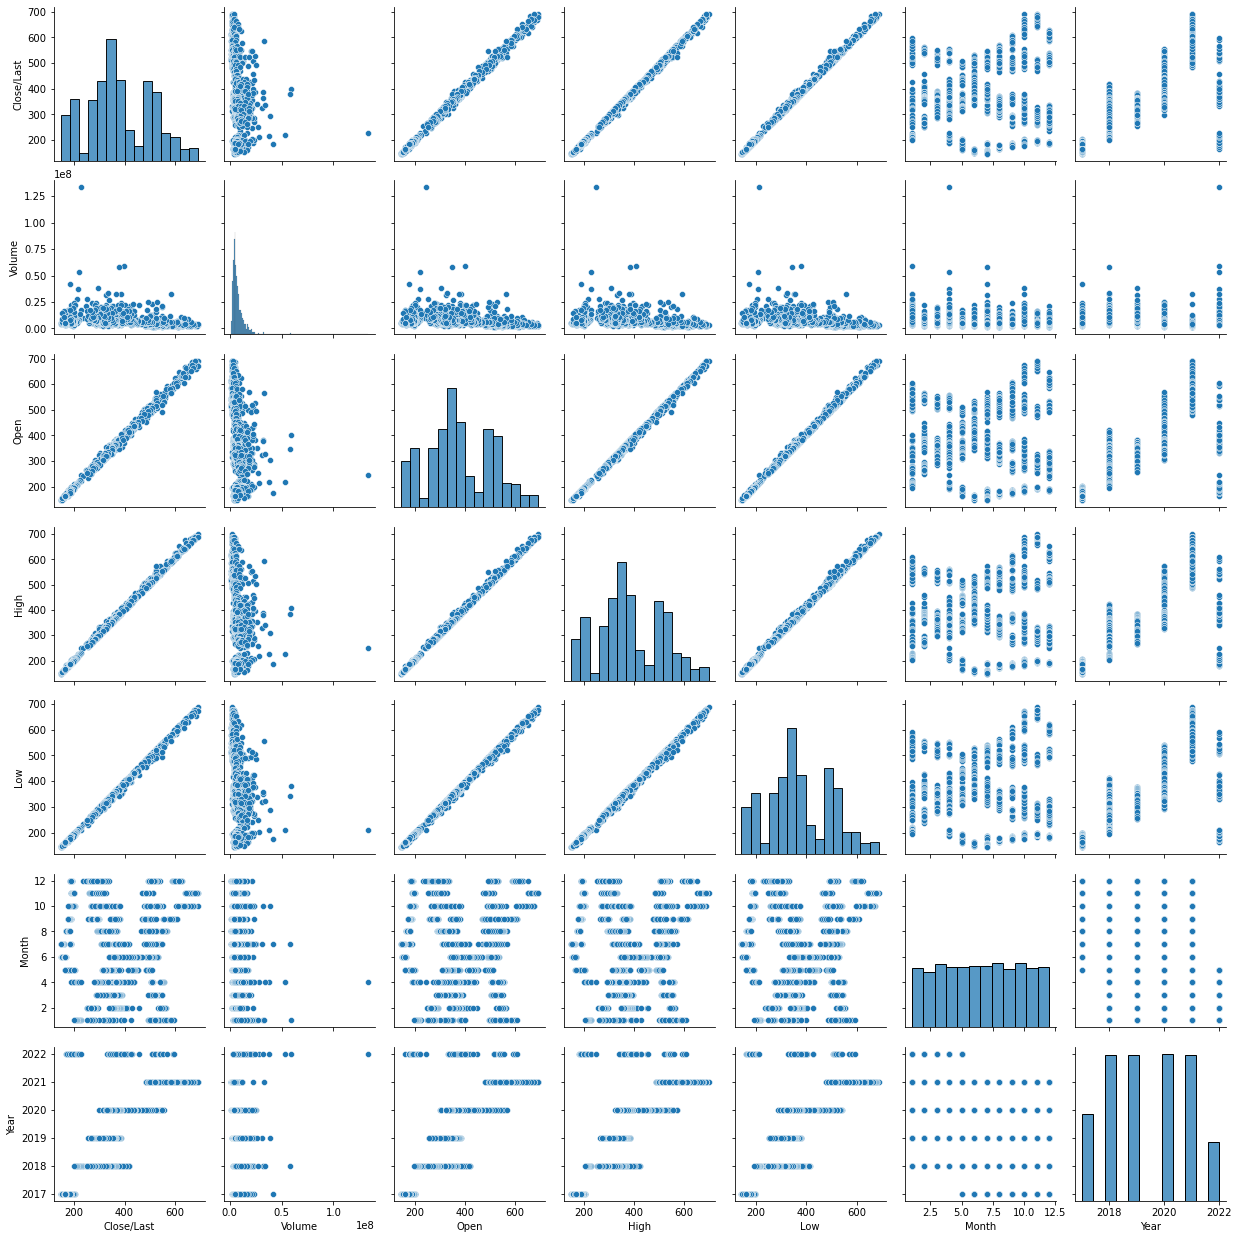

In [10]:
sns.pairplot(data)

<AxesSubplot:xlabel='Year', ylabel='Close/Last'>

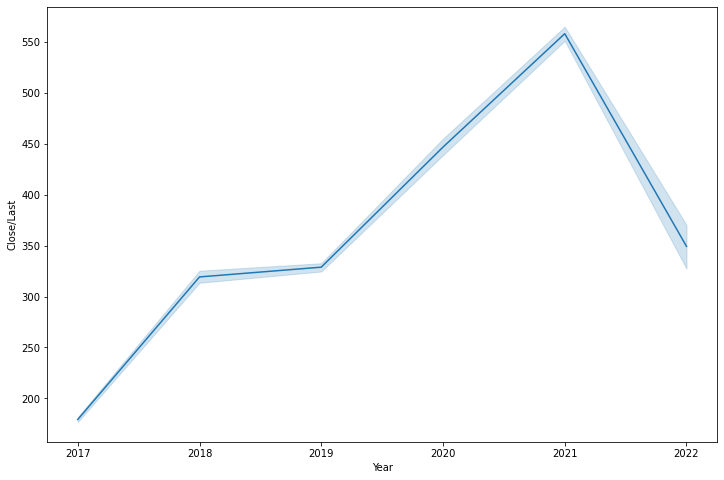

In [11]:
plt.figure(figsize=(12,8))
sns.lineplot(x = data['Year'], y = data['Close/Last'], data = data)

<AxesSubplot:xlabel='Year', ylabel='Volume'>

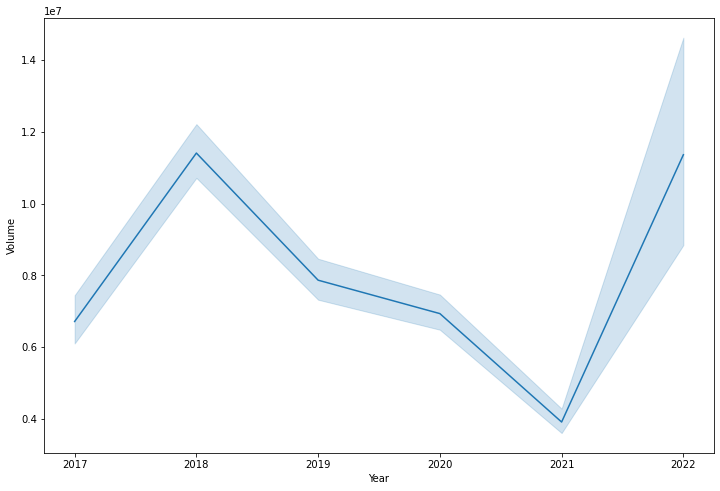

In [12]:
plt.figure(figsize=(12,8))
sns.lineplot(x = data['Year'], y = data['Volume'], data = data)

In [13]:
y = data['Close/Last']

In [14]:
X = data[['Open','High','Low']]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression()

In [19]:
lm.fit(X_train, y_train)

LinearRegression()

In [20]:
print(lm.coef_)

[-0.63322075  0.85192386  0.78147758]


In [21]:
print(lm.intercept_)

-0.011724364387248443


In [22]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ['Coeff'])

In [23]:
cdf

,Coeff
Open,-0.633221
High,0.851924
Low,0.781478


In [24]:
pred = lm.predict(X_test)

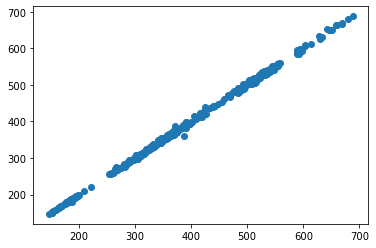

In [25]:
plt.scatter(y_test, pred)

C:\Users\amarn\anaconda3\envs\envtensflo\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close/Last', ylabel='Density'>

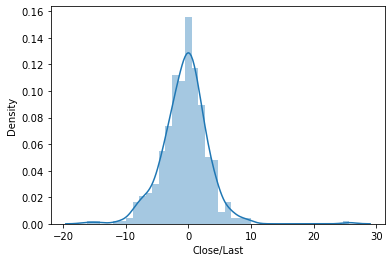

In [26]:
sns.distplot((y_test-pred))

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [28]:
print(mean_absolute_error(y_test, pred))

2.685243715813728


In [29]:
print(mean_squared_error(y_test, pred))

14.093030687381294


In [30]:
print(np.sqrt(mean_squared_error(y_test, pred)))

3.7540685512362844
